In [1]:
  # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
restaurants=pd.read_csv('Restaurant names and Metadata.csv')
restaurants.head(10)

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
5,The Fisherman's Wharf,https://www.zomato.com/hyderabad/the-fisherman...,"1,500","Sunday Brunches, Corporate Favorites, Great Bu...","Seafood, Goan, North Indian, Continental, Asian","12Noon to 3:30PM, 4PM to 6:30PM, 7PM to 11:30P..."
6,eat.fit,https://www.zomato.com/hyderabad/eat-fit-gachi...,500,Food Hygiene Rated Restaurants in Hyderabad,"Healthy Food, North Indian, Continental, South...",7 AM to 10 PM
7,Shah Ghouse Spl Shawarma,https://www.zomato.com/hyderabad/shah-ghouse-s...,300,NaN,Lebanese,12 Noon to 12 Midnight
8,Hyper Local,https://www.zomato.com/hyderabad/hyper-local-g...,"1,000","Great Buffets, Live Sports Screenings, Best Ba...","American, Chinese, North Indian, Kebab, South ...",12 Noon to 12 Midnight
9,Cream Stone,https://www.zomato.com/hyderabad/cream-stone-g...,350,Frozen Delights,"Ice Cream, Desserts","10 AM to 1 AM (Mon-Thu), 10 AM to 1:30 AM (Fri..."


In [5]:
restaurants.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [6]:
restaurants['Cost']=pd.to_numeric(restaurants['Cost'].str.replace(',',''))
restaurants.dtypes

Name           object
Links          object
Cost            int64
Collections    object
Cuisines       object
Timings        object
dtype: object

In [7]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [10]:
review=pd.read_csv('Restaurant reviews.csv')
review.head(10)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
5,Beyond Flavours,Nagabhavani K,"Ambiance is good, service is good, food is aPr...",5,1 Review,5/24/2019 15:22,0
6,Beyond Flavours,Jamuna Bhuwalka,"Its a very nice place, ambience is different, ...",5,1 Review,5/24/2019 1:02,0
7,Beyond Flavours,Sandhya S,Well after reading so many reviews finally vis...,4,1 Review,5/23/2019 15:01,0
8,Beyond Flavours,Akash Thorat,"Excellent food , specially if you like spicy f...",5,"1 Review , 1 Follower",5/22/2019 23:12,0
9,Beyond Flavours,Smarak Patnaik,Came for the birthday treat of a close friend....,5,"1 Review , 1 Follower",5/22/2019 22:37,0


In [11]:
review.dtypes

Restaurant    object
Reviewer      object
Review        object
Rating        object
Metadata      object
Time          object
Pictures       int64
dtype: object

In [12]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [13]:
review.dropna(inplace=True)
review.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [14]:
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


In [15]:
review=review[review['Rating']!='Like']
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [16]:
review['Rating']=pd.to_numeric(review['Rating'])
review['Reviews'],review['Followers']=review['Metadata'].str.split(',').str
review['Reviews']=pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers']=pd.to_numeric(review['Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review=review.loc[:,['Restaurant','Reviewer','Review','Rating','Reviews','Followers','Time','Pictures']]
review.dtypes

<ipython-input-16-467708eb6f68>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  review['Reviews'],review['Followers']=review['Metadata'].str.split(',').str


Restaurant            object
Reviewer              object
Review                object
Rating               float64
Reviews                int64
Followers            float64
Time          datetime64[ns]
Pictures               int64
dtype: object

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


<ipython-input-17-406c29238d4a>:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color='cgy')


Text(0.5, 1.0, 'Cuisines at Restaurants in Hyderabad (in order of Popularity)')

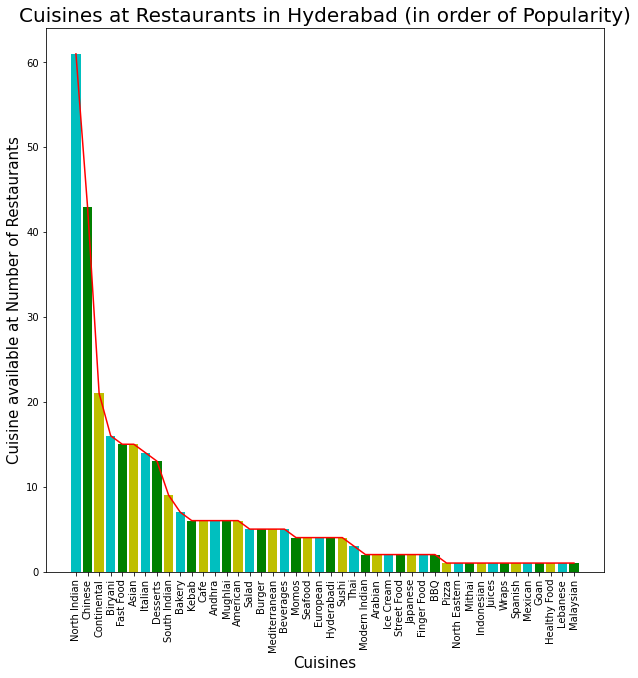

In [17]:
cuisine_list=restaurants.Cuisines.str.split(', ')
cuis={}
for i in cuisine_list:
    for j in i:
        if (j in cuis):
            cuis[j]+=1
        else:
            cuis[j]=1
cuis_df=pd.DataFrame(cuis.values(),index=cuis.keys(),columns={'Counts of Restaurants'})
cuis_df.sort_values(by='Counts of Restaurants',ascending=False,inplace=True)
top_10_cuis=cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)
top_10_cuis.reset_index()
plt.figure(figsize=(10,10))
plt.plot(cuis_df.index,cuis_df['Counts of Restaurants'],color='r')
plt.bar(cuis_df.index,cuis_df['Counts of Restaurants'],color='cgy')
plt.xlabel('Cuisines',size=15)
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants',size=15)
plt.title('Cuisines at Restaurants in Hyderabad (in order of Popularity)',size=20)

A total of 7442 users have sumbitted a review- with each user submitting at an average of 1.3375436710561677 reviews
----------The Top 15 Users who have submitted the most reviews------------
                            Reviewer  Review Count
654                           Ankita            13
3855                     Parijat Ray            13
2652                           Kiran            12
7009                    Vedant Killa            11
2311                       Jay Mehta            11
3131           Manojkumar D Nambisan            10
6126                         Sravani            10
5954                      Siva Kumar            10
4256                        Priyanka            10
264   Age Of Foodies (Suraj Karambe)            10
4130                 Prasun Gokhlani             9
3998               Prachita Jayaswal             9
3694                           Nillu             9
2642                 Khushboo Pandey             9
7172                           Vinay       

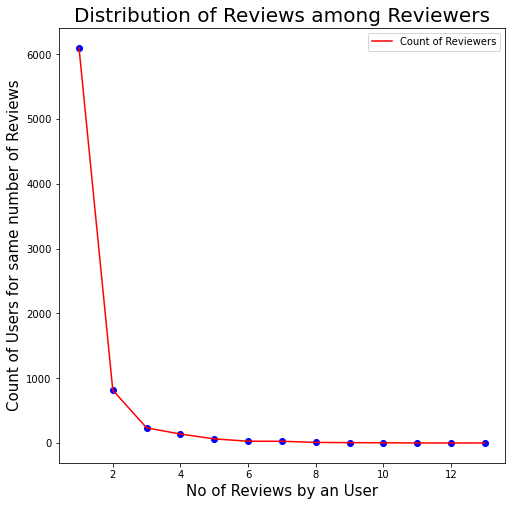

In [18]:
top_reviewer=review.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_reviewer=top_reviewer.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a review- with each user submitting at an average of {} reviews'.format(review.Reviewer.nunique(),np.average(review.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most reviews------------')
print(top_reviewer[:15])
top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(8,8))
plt.plot(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='r')
plt.scatter(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])